## Import  Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Submit/HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Pre-processing

In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

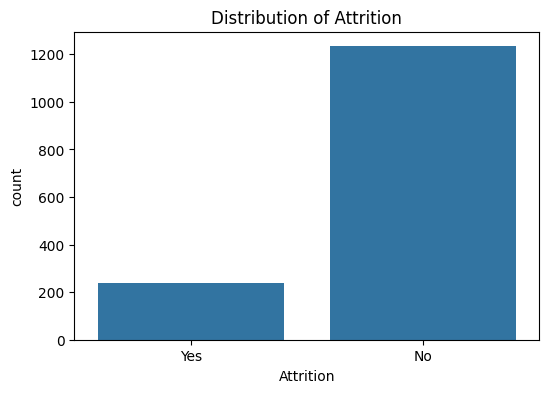

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition')
plt.title('Distribution of Attrition')
plt.show()

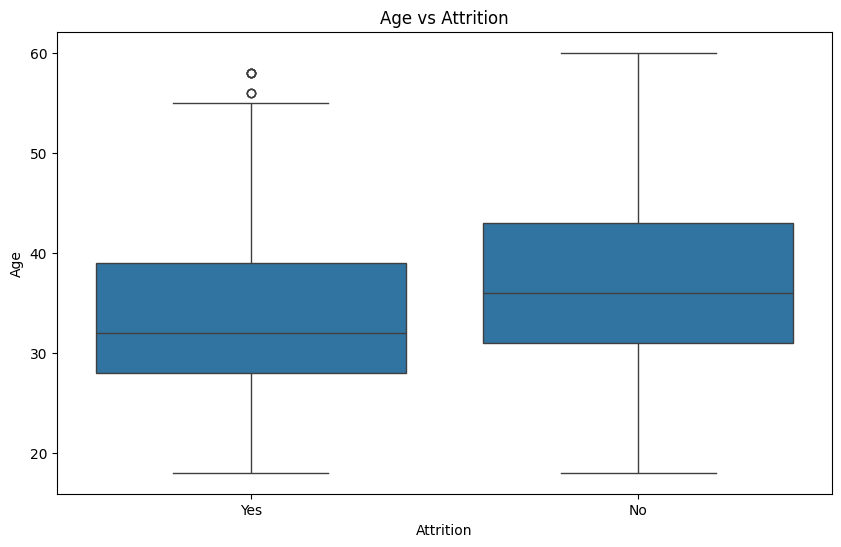

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='Age')
plt.title('Age vs Attrition')
plt.show()

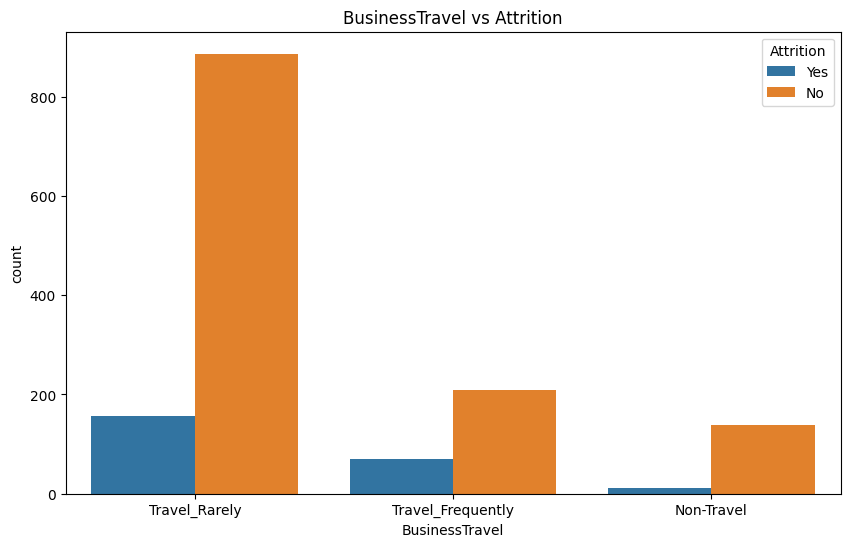

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='BusinessTravel', hue='Attrition')
plt.title('BusinessTravel vs Attrition')
plt.show()

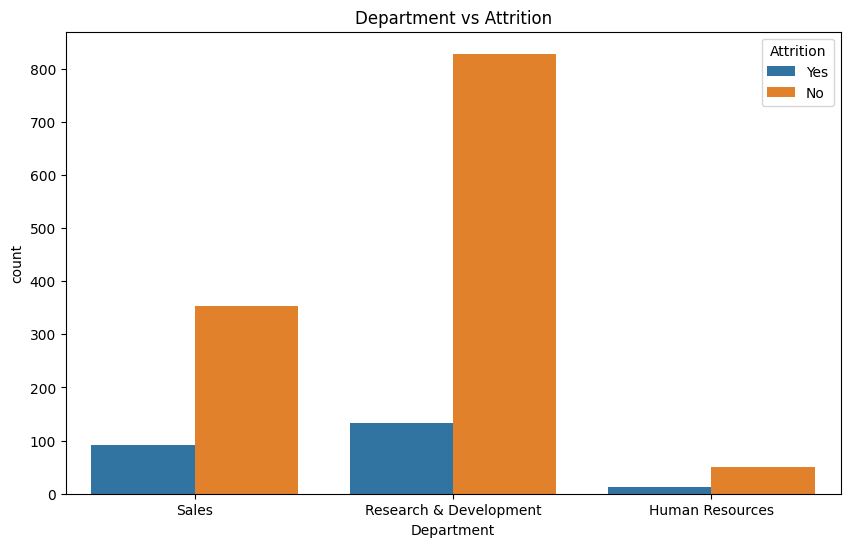

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.show()

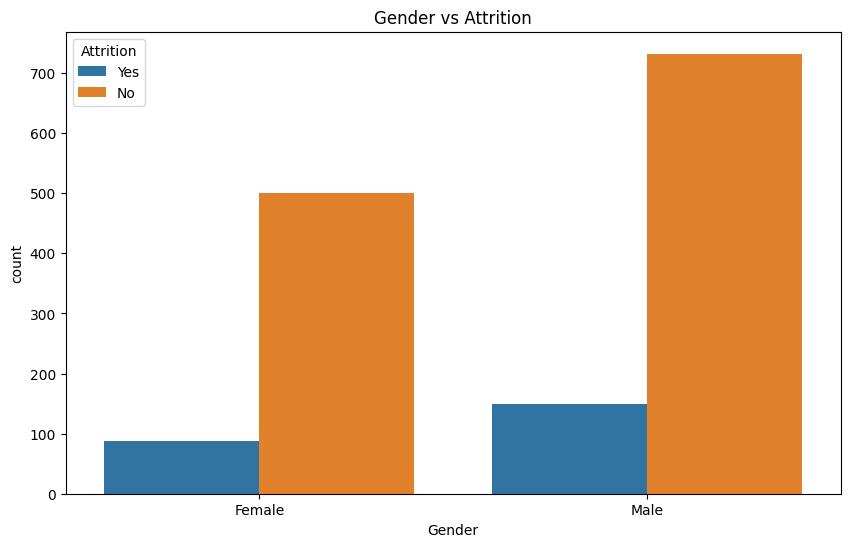

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Gender vs Attrition')
plt.show()

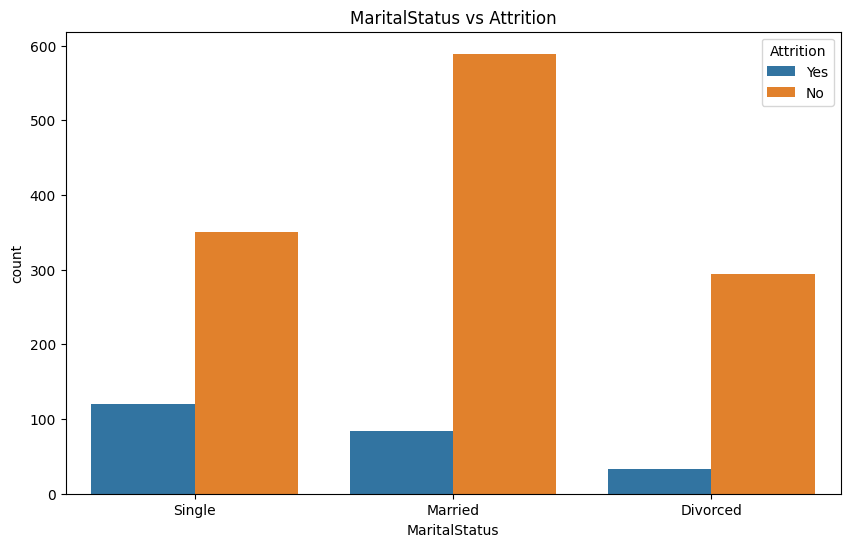

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MaritalStatus', hue='Attrition')
plt.title('MaritalStatus vs Attrition')
plt.show()

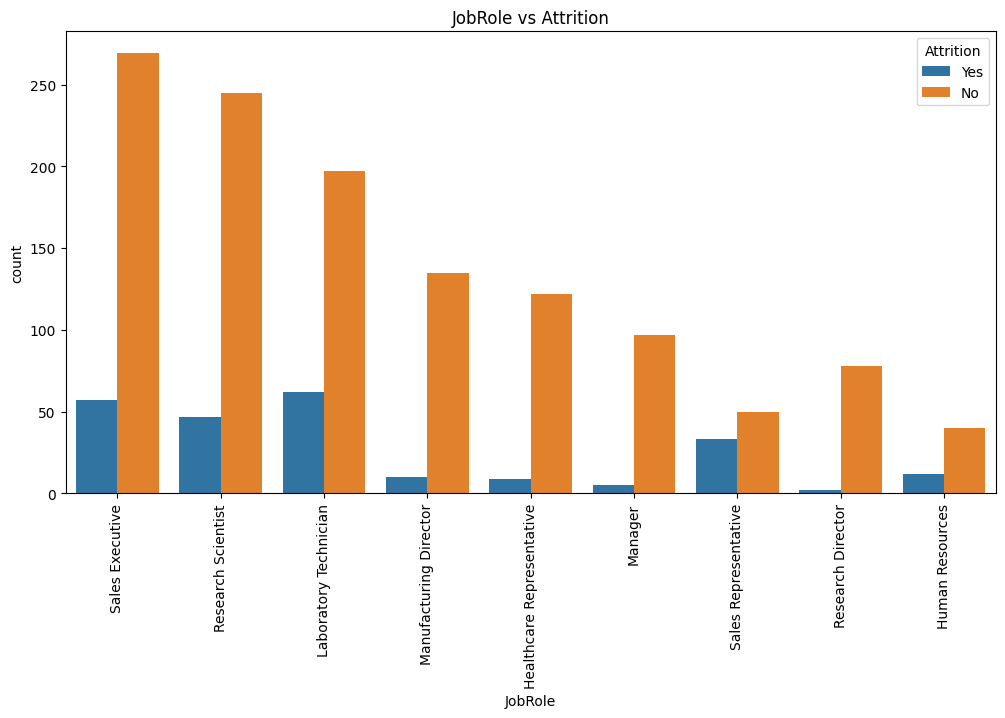

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.title('JobRole vs Attrition')
plt.xticks(rotation=90)
plt.show()

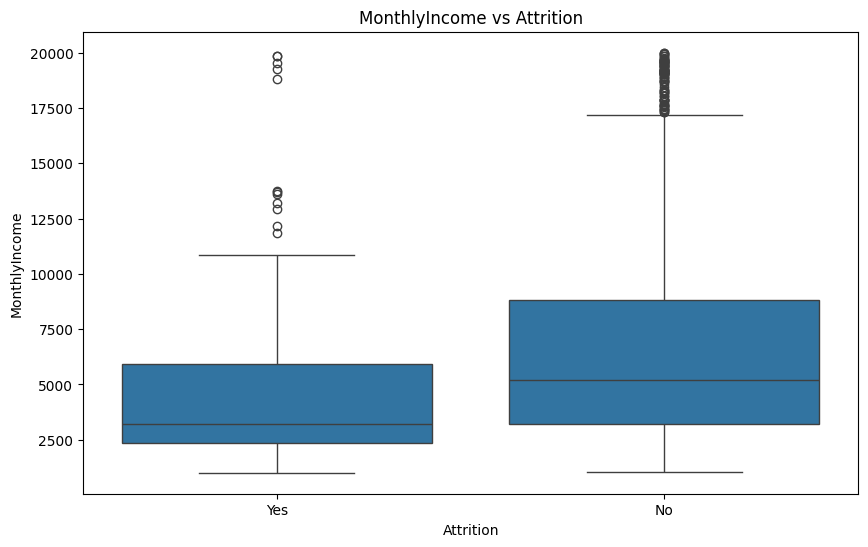

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title('MonthlyIncome vs Attrition')
plt.show()

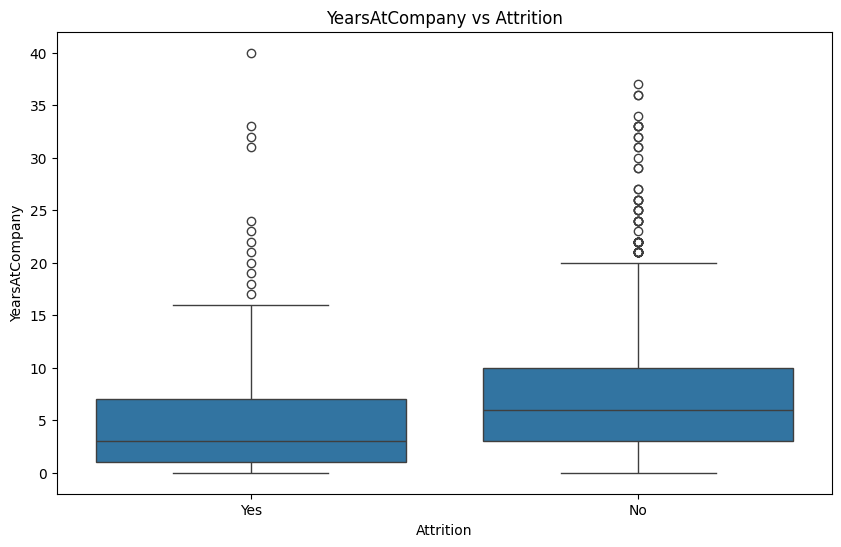

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany')
plt.title('YearsAtCompany vs Attrition')
plt.show()

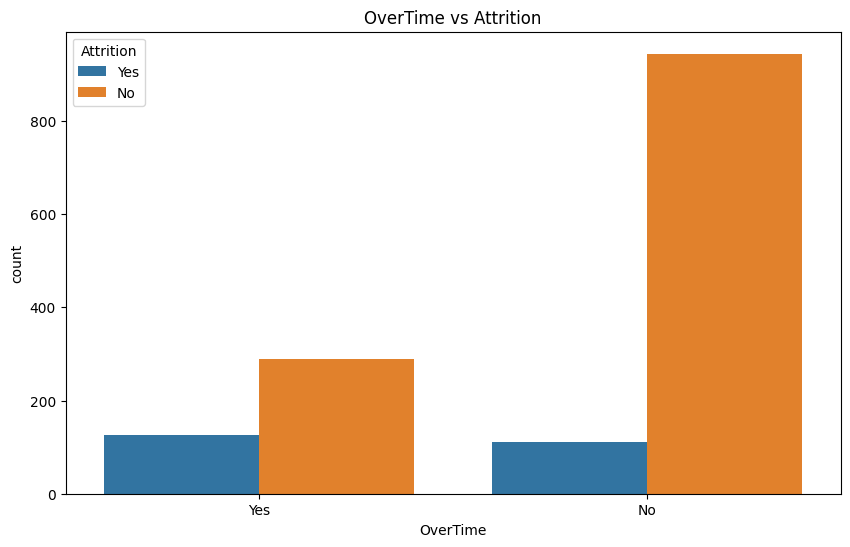

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.title('OverTime vs Attrition')
plt.show()

## Train-Test Split

In [ ]:
from sklearn.preprocessing import LabelEncoder
!pip show scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
print("LabelEncoder imported successfully")


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick
LabelEncoder imported successfully


In [ ]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])  # Yes = 1, No = 0
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

In [ ]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (1176, 34) (1176,)
Testing set shape: (294, 34) (294,)


In [ ]:
# Convert 'Over18' column to numeric
X_train['Over18'] = X_train['Over18'].map({'Y': 1, 'N': 0})
X_test['Over18'] = X_test['Over18'].map({'Y': 1, 'N': 0})



# Multilayer Perceptron (MLP)

In [ ]:
pip install scikit-learn numpy


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Define the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          activation='relu',
                          solver='adam',
                          max_iter=500,
                          random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [ ]:
y_pred = mlp_model.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.45      0.60       255
           1       0.17      0.72      0.27        39

    accuracy                           0.48       294
   macro avg       0.54      0.58      0.43       294
weighted avg       0.81      0.48      0.56       294

Accuracy Score:
0.48299319727891155


# Convolutional Neural Networks (CNN)

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [ ]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = cnn_model.fit(X_train_reshaped, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7968 - loss: 0.5105 - val_accuracy: 0.7966 - val_loss: 0.4653
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8441 - loss: 0.4021 - val_accuracy: 0.7966 - val_loss: 0.4301
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8463 - loss: 0.3525 - val_accuracy: 0.8220 - val_loss: 0.4061
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8528 - loss: 0.3491 - val_accuracy: 0.8305 - val_loss: 0.3903
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8764 - loss: 0.3360 - val_accuracy: 0.8263 - val_loss: 0.3843
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8775 - loss: 0.3079 - val_accuracy: 0.8390 - val_loss: 0.3842
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8696 - loss: 0.3450 - val_accuracy: 0.8305 - val_loss: 0.3748
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8982 - loss: 0.2881 - val_accuracy: 0.8305 - val

In [ ]:
y_pred_proba = cnn_model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary labels


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       255
           1       0.60      0.46      0.52        39

    accuracy                           0.89       294
   macro avg       0.76      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294

Accuracy Score:
0.8877551020408163


# Artificial Neural Networks (ANN)

In [ ]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = ann_model.fit(X_train_scaled, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5887 - loss: 0.6552 - val_accuracy: 0.7966 - val_loss: 0.4822
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8283 - loss: 0.4546 - val_accuracy: 0.7966 - val_loss: 0.4539
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3735 - val_accuracy: 0.7966 - val_loss: 0.4343
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8280 - loss: 0.3876 - val_accuracy: 0.7966 - val_loss: 0.4229
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8488 - loss: 0.3443 - val_accuracy: 0.8051 - val_loss: 0.4128
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8596 - loss: 0.3237 - val_accuracy: 0.8093 - val_loss: 0.4049
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8881 - loss: 0.2983 - val_accuracy: 0.8136 - val_loss: 0.3976
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8935 - loss: 0.2738 - val_accuracy: 0.8178 - val_los

In [ ]:
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary labels


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       255
           1       0.93      0.33      0.49        39

    accuracy                           0.91       294
   macro avg       0.92      0.66      0.72       294
weighted avg       0.91      0.91      0.89       294

Accuracy Score:
0.9081632653061225


# Comparison Between MLP,CNN and ANN

In [ ]:
results = {
    'Model': ['MLP', 'CNN', 'ANN'],
    'Accuracy Score': [0.5204081632653061, 0.8741496598639455, 0.8945578231292517]
}

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
display(results_df)

,Model,Accuracy Score
0,MLP,0.520408
1,CNN,0.874150
2,ANN,0.894558


<ipython-input-48-df162d18f46b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy Score', data=results_df, palette='viridis')


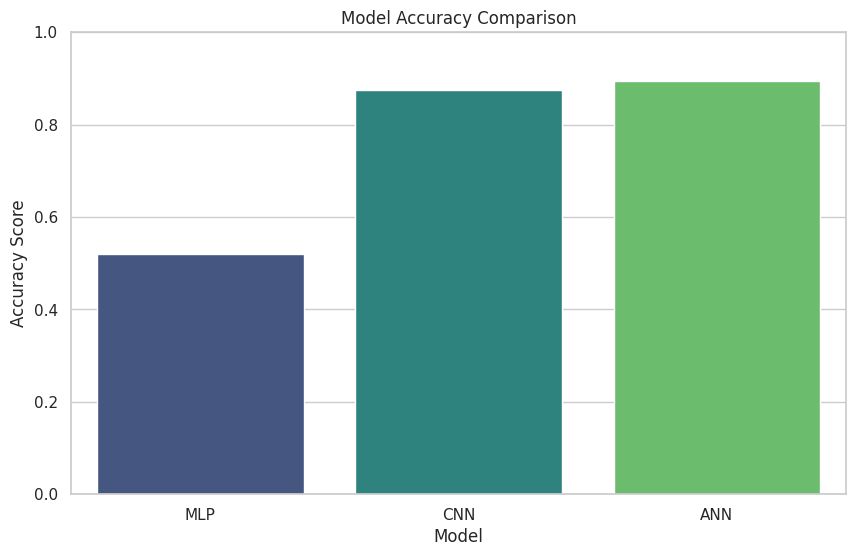

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy Score', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.show()